## Final Project - Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load and view the dataset

In [3]:
dataset=pd.read_csv('excel/credit_card.csv')

In [4]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


## Remove any unnecessary columns

In [ ]:
del dataset['Ethnicity']
del dataset['YearsEmployed']
del dataset['DriversLicense']
del dataset['Citizen']
del dataset['Industry']
del dataset['BankCustomer']

In [36]:
del dataset['ZipCode']

## Check for null values

In [37]:
dataset.isnull().sum()

Gender          0
Age             0
Debt            0
Married         0
PriorDefault    0
Employed        0
CreditScore     0
Income          0
Approved        0
dtype: int64

## Split the data into dependent and independent variables

In [38]:
dataset.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'PriorDefault', 'Employed',
       'CreditScore', 'Income', 'Approved'],
      dtype='object')

In [49]:
X=dataset[['Gender', 'Age', 'Debt', 'Married', 'PriorDefault', 'Employed',
       'CreditScore', 'Income']]
y=dataset['Approved']

## Handling Categorical Variables

In [50]:
dataset['Gender'].value_counts()

1    480
0    210
Name: Gender, dtype: int64

In [51]:
dataset['Married'].value_counts()

1    525
0    165
Name: Married, dtype: int64

In [52]:
dataset['PriorDefault'].value_counts()

1    361
0    329
Name: PriorDefault, dtype: int64

In [53]:
dataset['Employed'].value_counts()

0    395
1    295
Name: Employed, dtype: int64

### All the categorical variables are already numerical

# Experiment 1

## Split the dataset into Training and Testing Set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.15, random_state=0)

## Training the Logistic Regression model on the Training set

In [56]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,y_train.values.ravel())

C:\Users\toddp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predict

In [57]:
X.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'PriorDefault', 'Employed',
       'CreditScore', 'Income'],
      dtype='object')

In [58]:
classifier.predict([[1,30,4,1,0,1,40,500]])

array([1], dtype=int64)

# Experiment 2

## Split the dataset into Training and Testing Set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.15, random_state=0)

## Training the Logistic Regression model on the Training set

In [60]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,y_train.values.ravel())

C:\Users\toddp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predict

In [61]:
classifier.predict([[1,30,4,1,0,1,40,500]])

array([1], dtype=int64)

## Making the confusion matrix

In [62]:
y_pred=classifier.predict(X_test.values)

In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[48 13]
 [ 6 37]]


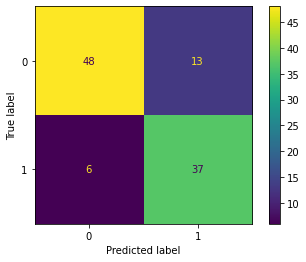

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
display.plot()
plt.show()

## Classification Report

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83        61
           1       0.74      0.86      0.80        43

    accuracy                           0.82       104
   macro avg       0.81      0.82      0.82       104
weighted avg       0.83      0.82      0.82       104

